# **1.Load The Data Sets**

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India (2).csv


In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
file_path = list(uploaded.keys())[0]
movies_df = pd.read_csv(file_path, encoding='latin1')

# **2.Data Cleaning**

In [ ]:
# Drop rows where 'Name' is NaN as it's essential for identifying movies
movies_df = movies_df.dropna(subset=['Name'])

# Extract and convert 'Year' to numeric
movies_df['Year'] = movies_df['Year'].astype(str)
movies_df['Year'] = movies_df['Year'].str.extract(r'(\d{4})')[0]
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce').fillna(0).astype(int)

# Extract duration in minutes and convert to numeric, filling missing with the median duration
movies_df['Duration'] = movies_df['Duration'].astype(str)
movies_df['Duration'] = pd.to_numeric(movies_df['Duration'].str.extract(r'(\d+)')[0], errors='coerce')
movies_df['Duration'] = movies_df['Duration'].fillna(movies_df['Duration'].median())

# Fill missing 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3' with 'Unknown'
movies_df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = movies_df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

# Fill missing 'Rating' with the median rating
movies_df['Rating'] = movies_df['Rating'].fillna(movies_df['Rating'].median())

# Fill missing 'Votes' with 0 and convert to numeric
movies_df['Votes'] = movies_df['Votes'].astype(str)
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)


# **3.Feature Engineering**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define feature columns and target column
feature_columns = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target_column = 'Rating'

# Split the data into features (X) and target (y)
X = movies_df[feature_columns]
y = movies_df[target_column]

# Define column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Duration', 'Votes']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4.Model Building and Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the preprocessing and model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', RandomForestRegressor())])

# **5.Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

MAE: 0.4144239200515797, MSE: 0.6222554574468085, R2: 0.36008924292309596


# **6.Plot Predicted vs. Actual Ratings**

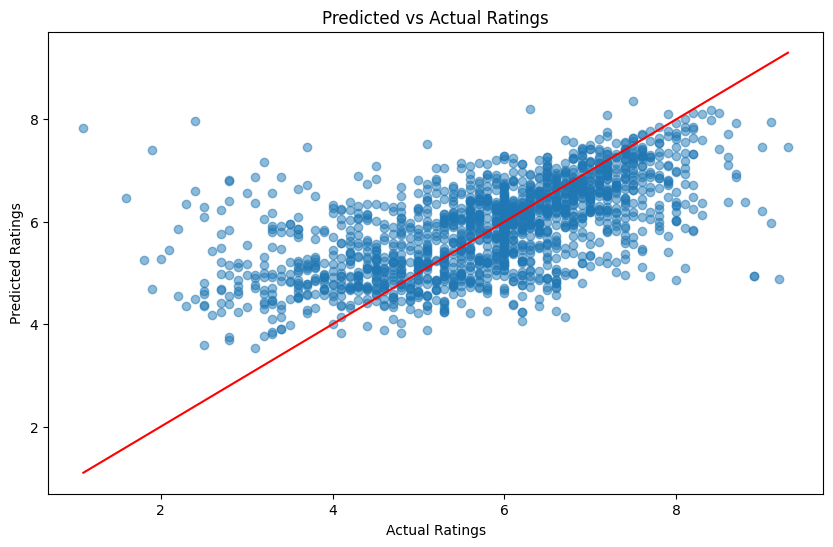

In [ ]:
import matplotlib.pyplot as plt

# Plotting Predicted vs Actual Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()